# Fourier Transform on Wave Data

In [2]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[16, 12]
plt.rcParams.update({'font.size':18})
import warnings
warnings.filterwarnings('ignore')

### Step 1: Import our data

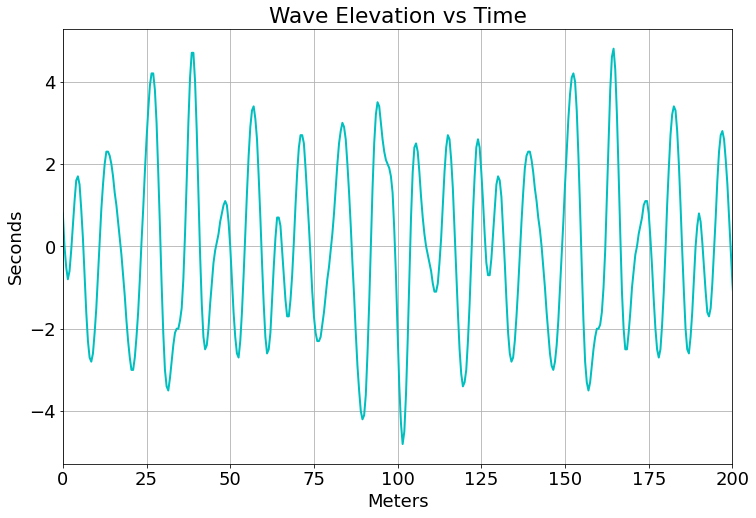

In [24]:
# Import
wave_data = np.genfromtxt('WaveData.csv') # time and wave elevation
time = wave_data[:,0]
elevation = wave_data[:,1]

# Plot
plt.figure(figsize=(12,8))
plt.plot(time, elevation, color='c', linewidth=2)
plt.xlim(0,200) 
plt.title('Wave Elevation vs Time')
plt.xlabel('Meters')
plt.ylabel('Seconds')
plt.grid(True, which='both')
plt.show()

### Step 2: computing the Fourier Transform

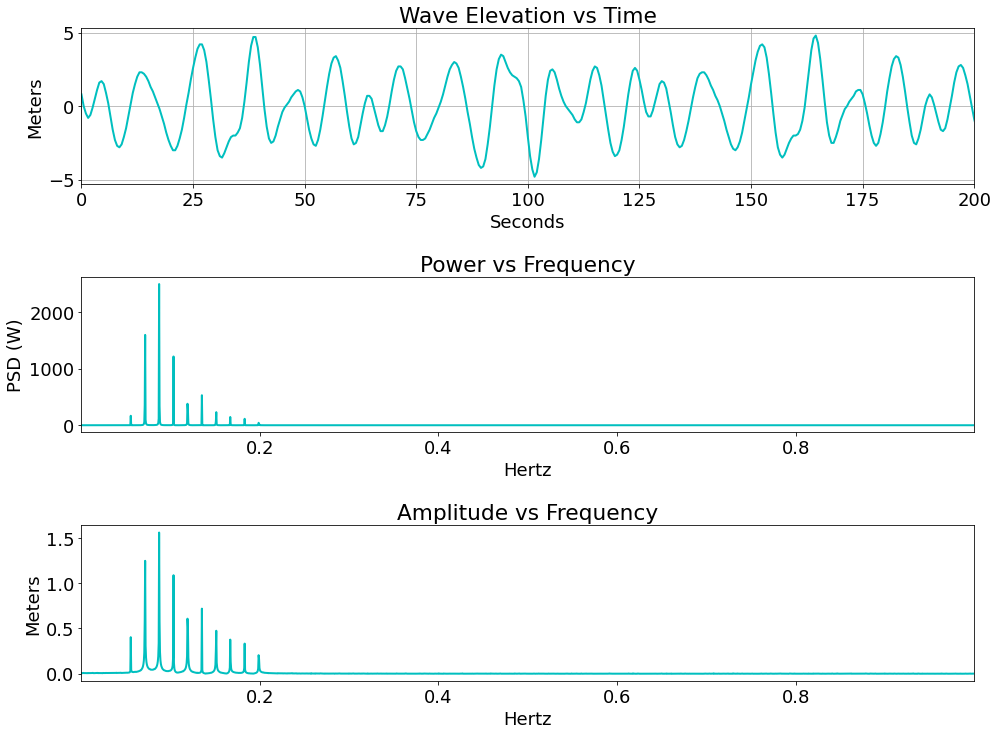

In [25]:
# Compute the Fourier Transform (FFT)

n = len(time) # length of data
time_step = 0.5 # interval for our time step based on the data
freq_hat = np.fft.fft(elevation,n) # compute the fft, fhat gives complex value fourier coefficients with magnitude and phase 
# magnitude tells how important that freq is and phase tells the mix of sine vs cosine
power = freq_hat *np.conj(freq_hat)/n # power spectrum, gives the (magnitude of each fourier coefficient)^squared
magnitude = np.abs(np.fft.fft(elevation))*2/n # compute the magnitude of each fourier coefficient from the fft
all_freq = (1/(time_step*n)) * np.arange(n) # create x-axis of all the frequencies
L = np.arange(1, np.floor(n/2), dtype='int') # only plot first half, plot power spectrum vs frequency in hertz


# Plot
fig,axs = plt.subplots(3,1)
plt.subplots_adjust(hspace=.6)

plt.sca(axs[0])
plt.plot(time, elevation, color='c', linewidth=2)
plt.xlim(0,200) 
plt.title('Wave Elevation vs Time')
plt.xlabel('Seconds')
plt.ylabel('Meters')
plt.grid(True, which='both')

plt.sca(axs[1])
plt.plot(all_freq[L],power[L],color='c',linewidth=2)
plt.xlim(all_freq[L[0]],all_freq[L[-1]])
plt.title('Power vs Frequency')
plt.xlabel('Hertz')
plt.ylabel('PSD (W)')

plt.sca(axs[2])
plt.plot(all_freq[L],magnitude[L],color='c',linewidth=2)
plt.xlim(all_freq[L[0]],all_freq[L[-1]])
plt.title('Amplitude vs Frequency')
plt.xlabel('Hertz')
plt.ylabel('Meters')

plt.show()

### Step 3: Remove all frequencies with low power then perform Inverse Fourier Transform
We will use 1000 as our threshold cutoff.

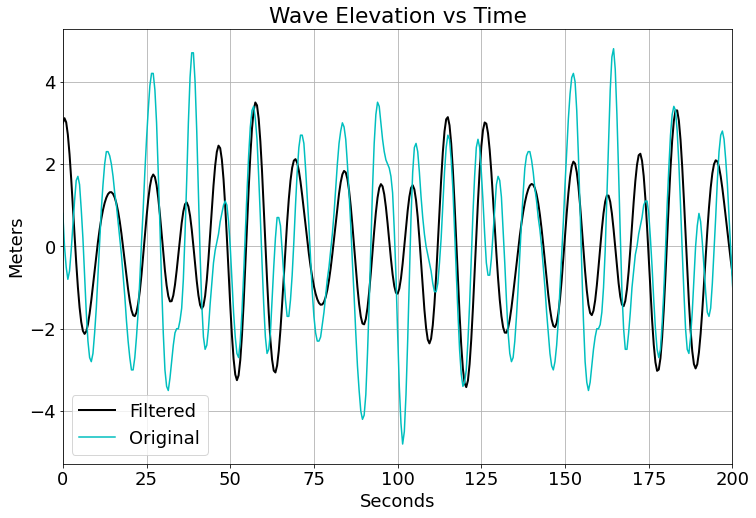

In [26]:
# Remove frequencies below threshold
indices = power > 1000 # find all freqs with large power spectrum
PSDclean = power *indices # zeros out all others
freq_hat = indices *freq_hat # zero out small fourier coeffiencts in Y

# Perform inverse fourier transform on filtered data
inverse = np.fft.ifft(freq_hat) 

# Plot
plt.figure(figsize=(12,8))
plt.plot(time, inverse, color='k', linewidth=2, label="Filtered")
plt.plot(time, elevation, color='c', linewidth=1.5, label="Original")
plt.xlim(0,200) 
plt.title('Wave Elevation vs Time')
plt.xlabel('Seconds')
plt.ylabel('Meters')
plt.legend()
plt.grid(True, which='both')

### Step 4: Get the Significant Wave Height

In [29]:
arr = np.unique(inverse) # get only unique values
arr = arr[arr >= 0] # get only the positive values (ie the part of the wave that goes above the ocean's surface and not below))
sorted_index_array = np.argsort(arr) # sort the array by size (returns indices)
sorted_array = arr[sorted_index_array] # recreate array from indicies
n = int(len(sorted_array)/3) # get 1/3 of the length of the array
rslt = sorted_array[-n:] # take only the top 1/3 of values
sig_wave = np.sum(rslt)/n # average the values
print("%.3g meters" % sig_wave) # print out with 3 digits

2.41 meters


# NDBC Data

In [4]:
# Import
with open("Scripps.csv") as file:
    reader = csv.reader(file, delimiter=' ')
    for row in reader:
        data = row
spec = []
freq = []
for i in range(len(data)):
    if i%2 == 0:
        spec.append(float(data[i]))
    else:
        freq.append(float(data[i].replace('(','').replace(')','')))

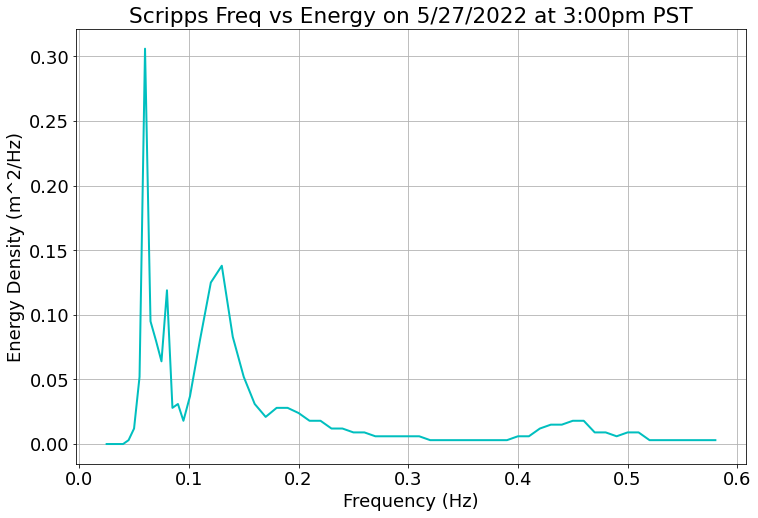

In [5]:
# Plot
plt.figure(figsize=(12,8))
plt.plot(freq, spec, color='c', linewidth=2)
plt.title('Scripps Freq vs Energy on 5/27/2022 at 3:00pm PST')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Energy Density (m^2/Hz)')
plt.grid(True, which='both')
plt.show()